In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf     ##tensorflow-gpu
import cv2                  ##opencv-python
import os
import matplotlib.pyplot as plt  ## matplotlib
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Make sure you have enabled the GPU runtime.')
else:
    print('GPU device found:', device_name)

GPU device found: /device:GPU:0


In [4]:
import cv2
import numpy as np

def resize_with_padding(image, target_size, padding_color=(0, 0, 0)):
    try:
        height, width = image.shape[:2]
        target_height, target_width = target_size

        # Calculate the aspect ratio of the original image
        aspect_ratio = width / height

        # Calculate the target aspect ratio
        target_aspect_ratio = target_width / target_height

        # Calculate the new size with padding
        if target_aspect_ratio > aspect_ratio:
            new_width = int(target_height * aspect_ratio)
            new_height = target_height
            pad_left = (target_width - new_width) // 2
            pad_right = target_width - new_width - pad_left
            pad_top = 0
            pad_bottom = 0
        else:
            new_width = target_width
            new_height = int(target_width / aspect_ratio)
            pad_left = 0
            pad_right = 0
            pad_top = (target_height - new_height) // 2
            pad_bottom = target_height - new_height - pad_top

        # Resize the image while maintaining the aspect ratio
        resized_image = cv2.resize(image, (new_width, new_height))

        # Create a new image with the target size and fill it with padding color
        padded_image = np.full((target_height, target_width, 3), padding_color, dtype=np.uint8)
        padded_image[pad_top:pad_top+new_height, pad_left:pad_left+new_width] = resized_image

        return padded_image

    except Exception as e:
        print("An error occurred during image resizing:", str(e))
        return None


.........1_Step...............


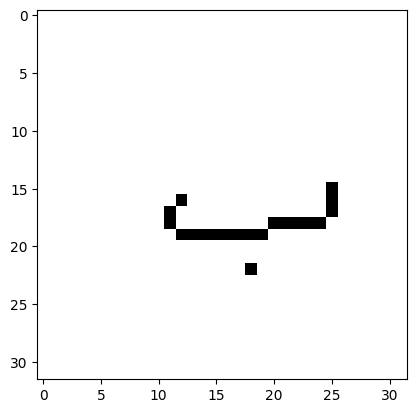

.........2_Step...............
Resize_image


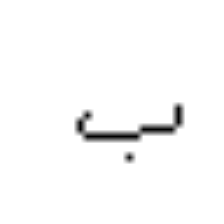

In [5]:
train_data=r'/content/drive/MyDrive/2 ba'

Classes = ["2.1","2.2","2.3","2.4"]

print(".........1_Step...............")
for category in Classes :
    path=os.path.join(train_data,category)
    for img in os.listdir(path):
       img_array=cv2.imread(os.path.join(path,img))
       backtorgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
       plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
       plt.show()
       break
    break
print(".........2_Step...............")
print("Resize_image")
img_size= 224 # ImageNet=>224*224
new_array = resize_with_padding(img_array, (224, 224), padding_color=(255, 255, 255))  # Resize the image with padding and set padding color to white
cv2_imshow(new_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
print("new_array")
new_array.shape

new_array


(224, 224, 3)

In [7]:
print("old_array")
img_array.shape

old_array


(32, 32, 3)

In [8]:
print(".........3_Step...............")
print("read all the images and convertin them to array")
training_Data =[]  ## data
def create_training_Data():
      for category in Classes:
          path=os.path.join(train_data,category)
          class_num= Classes.index(category)   ## 0 1 ##lable
          for img in os.listdir(path):
              try:
                  img_array=cv2.imread(os.path.join(path,img))
                  new_array=cv2.resize(img_array,(img_size,img_size))
                  training_Data.append([new_array,class_num])
              except Exception as e:
                  pass
print("training_Data")
create_training_Data()
print(len(training_Data))


.........3_Step...............
read all the images and convertin them to array
training_Data
1799


In [9]:
print(".........3_Step...............")
temp=np.array(training_Data)
temp.shape
import random
random.shuffle(training_Data)
X=[]   ##data/feature
Y=[]   ## label
for features,label in training_Data:
    X.append(features)
    Y.append(label)
print("converting it to 4 dimenstion")
X=np.array(X).reshape(-1,img_size,img_size,3)  ## converting it to 4 dimenstion
X.shape   ##output: (un data ,224,224,3)

.........3_Step...............
converting it to 4 dimenstion


<ipython-input-9-f795a976e93c>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp=np.array(training_Data)


(1799, 224, 224, 3)

In [10]:
print(".........4_Step...............")
print("normalize the data")
X=X/255.0;  #we ara normalizrd it
Y=np.array(Y)
Y.shape
X.shape

.........4_Step...............
normalize the data


(1799, 224, 224, 3)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
print(X_train.shape)

(1259, 224, 224, 3)


In [12]:
print(".........1_Step...............")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
print(".........2_Step...............")
print("per-trained Model")
model= tf.keras.applications.EfficientNetV2B0()
#model = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
#model.summary()
print(".........3_Step...............")
print("Transfer Learning -Tuning ,weights will start from last check point")
base_input = model.layers[0].input
base_output=model.layers[-2].output
base_input
base_output

.........1_Step...............
.........2_Step...............
per-trained Model
.........3_Step...............
Transfer Learning -Tuning ,weights will start from last check point


<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'top_dropout')>

In [13]:
print(".........4_Step...............")
print("New_model")
final_output=layers.Dense(128)(base_output)   ##adding new layer , after the output  of global pooling layer
#final_output=layers.Dropout(0.4)(final_output)
final_output=layers.Activation ('relu')(final_output)  ##activation function
final_output=layers.Dense(64)(final_output)
#final_output=layers.Dropout(0.4)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(4,activation='softmax')(final_output)  ## my classes are 07
final_output

.........4_Step...............
New_model


<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_2')>

In [14]:
print(".........5_Step...............")
new_model = keras.Model(inputs=base_input ,outputs=final_output)
#new_model.summary()

.........5_Step...............


In [15]:
print(".........7_Step...............")
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",run_eagerly=True,metrics= ["accuracy"])

.........7_Step...............


In [16]:
import time
start_time= time.time()
history=new_model.fit(X_train,y_train,epochs=20)
ent_time=time.time()

Epoch 1/20


40/40 [==============================] - 70s 839ms/step - loss: 0.7321 - accuracy: 0.6934
Epoch 2/20
40/40 [==============================] - 29s 727ms/step - loss: 0.2732 - accuracy: 0.9047
Epoch 3/20
40/40 [==============================] - 29s 727ms/step - loss: 0.1945 - accuracy: 0.9365
Epoch 4/20
40/40 [==============================] - 29s 716ms/step - loss: 0.1272 - accuracy: 0.9643
Epoch 5/20
40/40 [==============================] - 29s 727ms/step - loss: 0.1169 - accuracy: 0.9611
Epoch 6/20
40/40 [==============================] - 29s 732ms/step - loss: 0.1441 - accuracy: 0.9579
Epoch 7/20
40/40 [==============================] - 29s 725ms/step - loss: 0.0985 - accuracy: 0.9651
Epoch 8/20
40/40 [==============================] - 29s 713ms/step - loss: 0.1079 - accuracy: 0.9603
Epoch 9/20
40/40 [==============================] - 29s 723ms/step - loss: 0.0789 - accuracy: 0.9706
Epoch 10/20
40/40 [==============================] - 30s 753ms/step - loss: 0.1064 - accuracy: 0.9651


In [17]:
time=ent_time-start_time
print(f" Time: {time} s")

 Time: 629.6965010166168 s


In [18]:
new_model.save('model_res04.h5')
new_model=tf.keras.models.load_model('model_res04.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
loss, accuracy=new_model.evaluate(X_test,y_test)
print("accuracy=",accuracy)

17/17 [==============================] - 5s 157ms/step - loss: 1.6186 - accuracy: 0.2519
accuracy= 0.2518518567085266


In [20]:
loss, accuracy=new_model.evaluate(X_train,y_train)
print("accuracy=",accuracy)

40/40 [==============================] - 3s 73ms/step - loss: 1.6331 - accuracy: 0.2486
accuracy= 0.2486100047826767


In [21]:
SIZE=256
new_model=tf.keras.models.load_model('/content/model_res04.h5')

.........8_Step...............
list all data in history
.........9_Step...............
dict_keys(['loss', 'accuracy'])


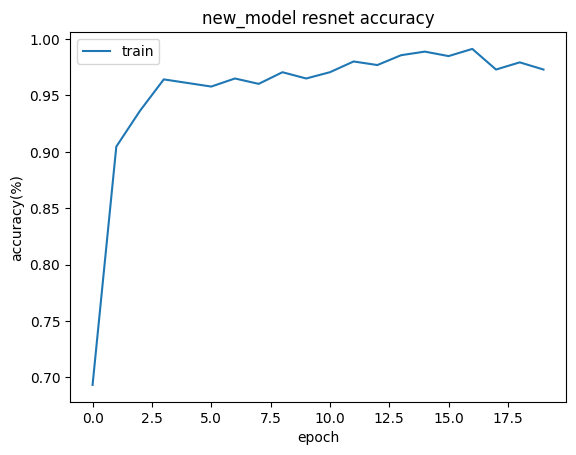

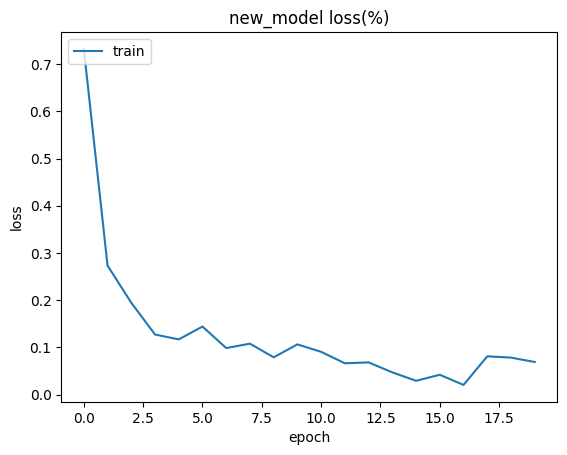

In [22]:
print(".........8_Step...............")
print("list all data in history")
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import file_io
%matplotlib inline
import keras
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import *
import skimage
from skimage.transform import rescale, resize
import pydot
print(".........9_Step...............")
# list all data in history",
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('new_model resnet accuracy')
plt.ylabel('accuracy(%)')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('new_model loss(%)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

In [23]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Load and preprocess the image
img_path = '/content/ba.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)
x = tf.expand_dims(x, axis=0)

# Perform image prediction
new_x = resize_with_padding(x, (256, 256), padding_color=(255, 255, 255))  # Resize the image with padding and set padding color to white
new_x = preprocess_input(new_x)
new_x = tf.expand_dims(x, axis=0)
preds = new_model.predict(x)
print(preds)

An error occurred during image resizing: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

1/1 [==============================] - 4s 4s/step
[[1. 0. 0. 0.]]


<ipython-input-24-eb2b08025900>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = new_model.predict_generator(X_test).argmax(axis=1)


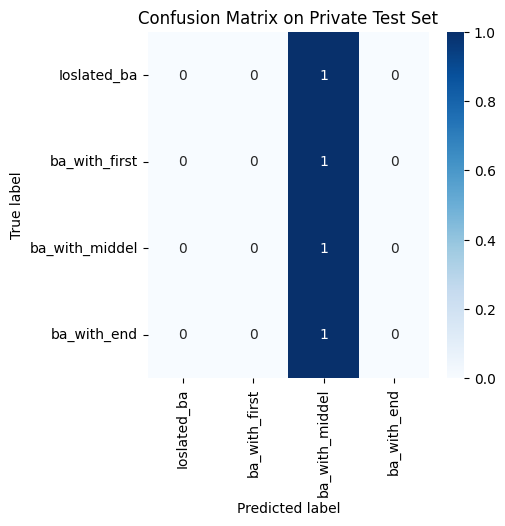

 Finding Accuracy, precision and recall
Accuracy   : 0.2518518518518518
Precision : 0.06342935528120712
Recall    : 0.2518518518518518
F1-score  : 0.10133683979837826


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#print(".........10_Step...............")
#print(".........Test dataset ...............")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.python.lib.io import file_io

import keras
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from seaborn import heatmap

emotions = {0:'Ioslated_ba', 1:'ba_with_first', 2:'ba_with_middel', 3:'ba_with_end'}

y_pred = new_model.predict_generator(X_test).argmax(axis=1)
y_true = y_test

cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=emotions.values(),
  columns=emotions.values()
  )
plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Private Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(" Finding Accuracy, precision and recall")
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred,average="weighted")
print("Precision :", precision)
recall = recall_score(y_test, y_pred,average="weighted")
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred,average="weighted")
print("F1-score  :", F1_score)

In [25]:
# #print(".........Train dataset ...............")
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# import tensorflow as tf
# from tensorflow.python.lib.io import file_io

# import keras
# from keras.preprocessing.image import ImageDataGenerator

# from sklearn.metrics import confusion_matrix
# from seaborn import heatmap

# emotions = {0:'Ioslated_ba', 1:'ba_with_first', 2:'ba_with_middel', 3:'ba_with_end'}

# y_pred = new_model.predict_generator(X_train).argmax(axis=1)
# y_true = y_train

# cmat_df_test=pd.DataFrame(
#   confusion_matrix(y_true, y_pred, normalize='true').round(2),
#   index=emotions.values(),
#   columns=emotions.values()
#   )
# plt.figure(figsize=(5,5))
# heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
# plt.tight_layout()
# plt.title('Confusion Matrix on Private Train Set')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()
# print(" Finding Accuracy, precision and recall")
# # Finding precision and recall
# accuracy = accuracy_score(y_train, y_pred)
# print("Accuracy   :", accuracy)
# precision = precision_score(y_train, y_pred,average="weighted")
# print("Precision :", precision)
# recall = recall_score(y_train, y_pred,average="weighted")
# print("Recall    :", recall)
# F1_score = f1_score(y_train, y_pred,average="weighted")
# print("F1-score  :", F1_score)

In [29]:
print(".........6_Step...............")
print("Loaded without classifier/ fully connected layers")
from keras.applications.vgg16 import VGG16
SIZE=256
model = VGG16(weights='imagenet',include_top= False , input_shape=(SIZE,SIZE,3))
print(".........7_Step...............")
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in model.layers:
	layer.trainable = False
model.summary()  #Trainable parameters will be 0

.........6_Step...............
Loaded without classifier/ fully connected layers
.........7_Step...............
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
               

In [30]:
SIZE=256
new_model=tf.keras.models.load_model('/content/model_res04.h5')

In [31]:
for layer in new_model.layers:
	layer.trainable = False

In [32]:
print(".........8_Step...............")
#Now, let us use features from convolutional network for RF
feature_ext= new_model.predict(X_train)
X_features = feature_ext.reshape(feature_ext.shape[0], -1)

.........8_Step...............
40/40 [==============================] - 4s 54ms/step


In [33]:
print(feature_ext.shape)

(1259, 4)


In [34]:
print("feature for 0.2 ResNet50\n",
      feature_ext[0])

feature for 0.2 ResNet50
 [0.08582928 0.28304076 0.52277553 0.10835438]


In [35]:
imge_features= (feature_ext[0]*255).astype(np.uint8)

In [36]:
pip install PIT

In [37]:
from PIL import Image
image=Image.fromarray(imge_features)
image.save("imge_features.png")
np.save("feature_ext.npy",feature_ext)